<a href="https://colab.research.google.com/github/aastha621/Skin-Cancer-Classification/blob/main/transfer_inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate

# from keras.utils import plot_model

In [ ]:
# example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate

 
# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
 
	return layer_out
 
# define model input
visible = Input(shape=(100, 100, 3))

# add inception module
layer = naive_inception_module(visible, 64, 128, 32)

# create model
model = Sequential(Model(inputs=visible, outputs=layer))

model.add(Dense(550,activation="relu")) 
model.add(Dense(550,activation="relu")) 
model.add(Dense(4,activation="softmax"))    #Adding the Hidden layer
  

# summarize model
model.summary()
# plot model architecture
# plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100, 100, 227)     6272      
                                                                 
 dense (Dense)               (None, 100, 100, 550)     125400    
                                                                 
 dense_1 (Dense)             (None, 100, 100, 550)     303050    
                                                                 
 dense_2 (Dense)             (None, 100, 100, 4)       2204      
                                                                 
Total params: 436,926
Trainable params: 436,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(1,1),activation = "relu" , input_shape = (100,100,3)) ,
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") , 
    tf.keras.layers.Conv2D(32,(5,5),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(80,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dense(40,activation ="relu"),
    tf.keras.layers.Dense(4,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
loaded_array = np.load("/content/drive/MyDrive/Cv skin cancer project/hm4cropImg.npy")
print(len(loaded_array))

2000


In [ ]:
loaded_array.shape

(2000, 100, 100, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
l=pd.read_csv('/content/drive/MyDrive/Cv skin cancer project/ham4cropmeta.csv')

In [ ]:
l

,Unnamed: 0,0,label
0,0,ISIC_0027419,2
1,1,ISIC_0025030,2
2,2,ISIC_0026769,2
3,3,ISIC_0025661,2
4,4,ISIC_0031633,2
...,...,...,...
1995,1995,ISIC_0027145,0
1996,1996,ISIC_0025256,0
1997,1997,ISIC_0026465,0
1998,1998,ISIC_0026256,0


In [ ]:
label=[]

In [ ]:
label=l.iloc[:, 2:3]
label

,label
0,2
1,2
2,2
3,2
4,2
...,...
1995,0
1996,0
1997,0
1998,0


In [ ]:
label=np.array(label)
# label=np.ravel(label)

In [ ]:
label

array([[2],
       [2],
       [2],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
label=np.ravel(label)
label

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
imagesflat=[]
for i in range(len(loaded_array)):
  imagesflat.append(loaded_array[i].flatten())

In [ ]:
imagesflat = np.array(imagesflat)

In [ ]:
imagesflat

array([[198, 156, 198, ..., 185, 164, 219],
       [ 23,  14,  26, ..., 209, 201, 231],
       [116, 124, 209, ..., 167, 141, 196],
       ...,
       [191, 179, 254, ..., 185, 188, 254],
       [182, 168, 251, ..., 198, 183, 254],
       [207, 196, 255, ...,  89, 103, 242]], dtype=uint8)

In [ ]:
imagesflat.shape

(2000, 30000)

In [ ]:
# label = np.ravel(label)
label

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
len(label)

2000

In [ ]:
len(imagesflat)

2000

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test=train_test_split(imagesflat,label,test_size=0.20,random_state=1,stratify=label)

In [ ]:
import tensorflow as tf
from keras import utils as np_utils 

In [ ]:
# one hot encode target values
trainY = tf.keras.utils.to_categorical(Y_train)
testY = tf.keras.utils.to_categorical(Y_test)

In [ ]:
npxtrain = np.array(X_train)
npxtest = np.array(X_test)
train_norm = npxtrain.astype('float32')
test_norm = npxtest.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
print(train_norm.shape)

(1600, 30000)


In [ ]:
print(trainY.shape)

(1600, 4)


In [ ]:
cx_train = npxtrain.reshape(npxtrain.shape[0], 100, 100, 3)
cx_test = npxtest.reshape(npxtest.shape[0], 100, 100, 3)

In [ ]:
cx_train.shape

(1600, 100, 100, 3)

In [ ]:
trainY.shape

(1600, 4)

In [ ]:
import keras
import keras.utils

## ResNET


In [ ]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
# from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(32, 32, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(100, 100, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 4,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
base_model.load_weights("/content/drive/MyDrive/Cv skin cancer project/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
H = model.fit(cx_train, trainY, epochs=10, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 231s 6s/step - loss: 1.1024 - acc: 0.6273 - val_loss: 152129.1875 - val_acc: 0.2562
Epoch 2/10
40/40 [==============================] - 223s 6s/step - loss: 0.7014 - acc: 0.7461 - val_loss: 171.8198 - val_acc: 0.2188
Epoch 3/10
40/40 [==============================] - 218s 5s/step - loss: 0.8970 - acc: 0.7461 - val_loss: 57.4288 - val_acc: 0.2562
Epoch 4/10
40/40 [==============================] - 220s 6s/step - loss: 0.6876 - acc: 0.7289 - val_loss: 1471.4395 - val_acc: 0.2562
Epoch 5/10
40/40 [==============================] - 219s 5s/step - loss: 0.5875 - acc: 0.7711 - val_loss: 8.7050 - val_acc: 0.3781
Epoch 6/10
40/40 [==============================] - 220s 6s/step - loss: 0.4855 - acc: 0.8258 - val_loss: 1.5843 - val_acc: 0.6000
Epoch 7/10
40/40 [==============================] - 222s 6s/step - loss: 0.3899 - acc: 0.8523 - val_loss: 3.7586 - val_acc: 0.4469
Epoch 8/10
40/40 [==============================] - 221s 6s/step - loss:

In [ ]:
_, accuracy = model.evaluate(cx_test, testY)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 13s 907ms/step - loss: 0.7965 - acc: 0.7825
Accuracy: 78.25


In [ ]:
import matplotlib.pyplot as plt


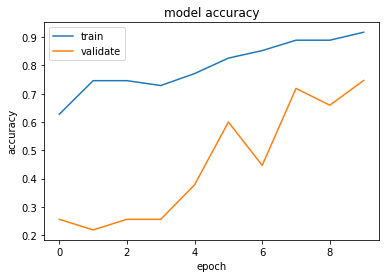

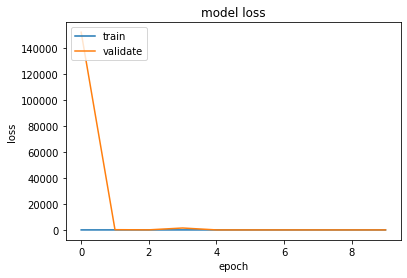

In [ ]:
# summarize fittedModel for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize fittedModel for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(cx_test, verbose=0)

# predict crisp classes for test set
display(yhat_probs)
yhat_classes = []
for i in range(len(yhat_probs)):
  maximum = 0
  index = -1
  for j in range(len(yhat_probs[i])):
    if yhat_probs[i][j] > maximum:
      maximum = yhat_probs[i][j]
      index = j
  yhat_classes.append(index)

array([[1.0000000e+00, 2.1505356e-04, 1.5303984e-01, 7.8684360e-02],
       [6.3336939e-02, 3.4164822e-01, 7.0603281e-01, 8.8829666e-01],
       [2.2320241e-02, 8.1802011e-02, 9.3967104e-01, 9.8007011e-01],
       ...,
       [6.7621469e-04, 9.9739754e-01, 3.3368766e-02, 1.5358329e-03],
       [2.1343738e-01, 7.5892562e-01, 3.0992290e-01, 4.7013164e-02],
       [9.9999976e-01, 5.0388843e-02, 2.2507903e-01, 5.7011318e-01]],
      dtype=float32)

In [ ]:
yhat_classes = tf.keras.utils.to_categorical(yhat_classes)

In [ ]:
yhat_classes

In [ ]:
accuracy = accuracy_score(testY, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testY, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testY, yhat_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, yhat_classes,average='weighted')
print('F1 score: %f' % f1)# accuracy: (tp + tn) / (p + n)

ValueError: ignored

In [ ]:
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(testY, yhat_classes)

print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testY, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testY, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, yhat_classes)
print('F1 score: %f' % f1)

ValueError: ignored

In [ ]:
# accuracy: (tp + tn) / (p + n)
# predict probabilities for test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

yhat_probs = model.predict(cx_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(yhat_probs).astype(int)
accuracy = accuracy_score(testY, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testY, yhat_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testY, yhat_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, yhat_classes,average='weighted')
print('F1 score: %f' % f1)# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testY, yhat_classes)

Accuracy: 0.242500
Precision: 0.594958
Recall: 0.892500
F1 score: 0.684502
